In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
reuse=tf.AUTO_REUSE
import keras

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


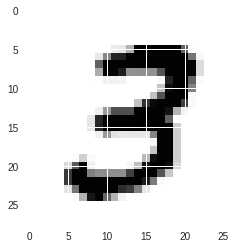

In [4]:
q=x_train[7]
plt.imshow(q)

In [0]:
def Initialize():    
    tf.set_random_seed(1)                   
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
        
        W1 = tf.get_variable("W1", [300,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b1 = tf.get_variable("b1", [300,1], initializer = tf.zeros_initializer())
        W2 = tf.get_variable("W2", [100,300], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b2 = tf.get_variable("b2", [100,1], initializer = tf.zeros_initializer())
        W3 = tf.get_variable("W3", [10,100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters
        

In [0]:
def costv(Z3,Y):
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=tf.transpose(Z3),labels=tf.transpose(Y)))
    return(loss)

In [0]:
def placeH(n_x,n_y):
    X=tf.placeholder(tf.float32, [n_x,None])
    Y=tf.placeholder(tf.float32, [n_y,None])
    return X,Y

In [0]:

def ForwardProp(X,dictw):
    W1=dictw['W1']
    W2=dictw['W2']
    W3=dictw['W3']
    b1=dictw['b1']
    b2=dictw['b2']
    b3=dictw['b3']
        
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    return(Z3)

In [0]:
def model(X_train, Y_train,  learning_rate = 0.001,epoch = 10, minibatch_size = 30):
    
    dictw=Initialize()
    n_x,m=X_train.shape
    n_y=Y_train.shape[0]
    X,Y=placeH(n_x,n_y)
    Z3=ForwardProp(X,dictw)
    costz=costv(Z3,Y)
    #train=  tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(costz)
    train = tf.train.AdamOptimizer(1e-4).minimize(costz)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())
        
        for i in range(epoch):
            r=0
            u=m//minibatch_size
            for v in range(u):
                x1=X_train[:,r:r+minibatch_size]
                y1=Y_train[:,r:r+minibatch_size]
                r=r+minibatch_size
                _,costl=ss.run([train,costz],feed_dict={X:x1,Y:y1})
        print("parameters trained")
        pp=ss.run(dictw)
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    return(pp)
            
        
    

In [10]:
X_train2=x_train.reshape(60000,784)/255

y_train2=np.eye(10)[y_train]
y_trainz=np.transpose(y_train2)
x_trainz=np.transpose(X_train2)
print(x_trainz.shape)


(784, 60000)


In [11]:
s=model(x_trainz,y_trainz)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

parameters trained
Train Accuracy: 0.98691666


In [0]:
X_test=x_test.reshape(10000,784)/255

y_test2=np.eye(10)[y_test]
y_testz=np.transpose(y_test2)
x_testz=np.transpose(X_test)
a,b=placeH(784,10)

In [0]:
qv=tf.Session()
Z3=ForwardProp(a,s)
#vt=q.run(Z3,feed_dict={a:x_testz,b:y_testz})

In [14]:
correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(b))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(qv.run(accuracy,feed_dict={a:x_testz,b:y_testz}))

0.9726


In [0]:
xxx=qv.run(Z3,feed_dict={a:x_trainz,b:y_trainz})

In [16]:
xxx.shape

(10, 60000)

In [0]:
def Initialize2():    
    tf.set_random_seed(1)                   
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:
        
        zW1 = tf.get_variable("zW1", [100,10], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb1 = tf.get_variable("zb1", [100,1], initializer = tf.zeros_initializer())
        zW2 = tf.get_variable("zW2", [300,100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb2 = tf.get_variable("zb2", [300,1], initializer = tf.zeros_initializer())
        zW3 = tf.get_variable("zW3", [784,300], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
        zb3 = tf.get_variable("zb3", [784,1], initializer = tf.zeros_initializer())
    

    parameters = {"zW1": zW1,
                  "zb1": zb1,
                  "zW2": zW2,
                  "zb2": zb2,
                  "zW3": zW3,
                  "zb3": zb3}
    
    return parameters

In [0]:
def loss2(Z3,Y):
    u=Z3-Y
    v=tf.square(u)
    f=tf.reduce_sum(v)
    f=f/60000
    return f

In [0]:
def ForwardProp2(X,dictw):
    W1=dictw['zW1']
    W2=dictw['zW2']
    W3=dictw['zW3']
    b1=dictw['zb1']
    b2=dictw['zb2']
    b3=dictw['zb3']
        
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3 = tf.nn.relu(tf.add(tf.matmul(W3,A2),b3))
    return(Z3)

In [0]:
def model2(X_train, Y_train,  learning_rate = 0.001,epoch = 20, minibatch_size = 30):
    
    dictw=Initialize2()
    n_x,m=X_train.shape
    n_y=Y_train.shape[0]
    X,Y=placeH(n_x,n_y)
    Z3=ForwardProp2(X,dictw)
    costz=loss2(Z3,Y)
    #train=  tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(costz)
    train = tf.train.AdamOptimizer(1e-4).minimize(costz)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())
        
        for i in range(epoch):
            r=0
            u=m//minibatch_size
            for v in range(u):
                x1=X_train[:,r:r+minibatch_size]
                y1=Y_train[:,r:r+minibatch_size]
                r=r+minibatch_size
                _,costl=ss.run([train,costz],feed_dict={X:x1,Y:y1})
        print("parameters trained")
        pp=ss.run(Z3,feed_dict={X:X_train,Y:Y_train})        
    return(pp)

In [21]:
x_testz.shape

(784, 10000)

In [22]:
opz=model2(xxx,x_trainz)

parameters trained


In [23]:
x_trainz.shape

(784, 60000)

In [0]:
opp=opz
ac=opp[:,11]

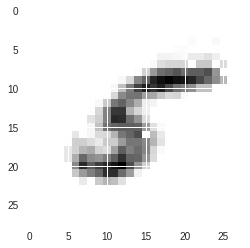

In [27]:
u=ac.reshape(28,28)
xz=np.abs(u)
plt.imshow(xz)


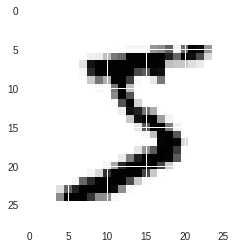

In [97]:
#ORIGINAL MNIST IMAGE
q=x_train[0]
plt.imshow(q)

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline
np.random.seed(1)

In [0]:
def place_cnn(n_h,n_w,n_c,n_y):
    X=tf.placeholder(dtype=tf.float32,shape=[None,n_h,n_w,n_c])
    Y=tf.placeholder(dtype=tf.float32,shape=[None,n_y])
    return X,Y

In [0]:
def Initialize3():
    tf.set_random_seed(1)                     
    with tf.variable_scope(tf.get_variable_scope(),reuse=tf.AUTO_REUSE) as scope:     
        W1 =tf.get_variable("qW1",[4,4,1,8],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
        W2 = tf.get_variable("qW2",[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
        parameters = {"qW1": W1,
                  "qW2": W2}
    
    return parameters

In [0]:
def Forward3(X,parameters):
    W1=parameters['qW1']
    W2=parameters['qW2'] 
    Z1 = tf.nn.conv2d(X,W1,strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,4,4,1], strides = [1,1,1,1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2,strides = [1,1,1,1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,1,1,1], padding = 'SAME')
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2,10,activation_fn=None)
    return(Z3)

In [59]:
(x_train3, y_train3), (x_test3, y_test3) = mnist.load_data()
print(x_train3.shape)

(60000, 28, 28)


In [0]:
x_train3z=x_train3.reshape(60000,28,28,1)/255
x_test3z=x_test3.reshape(10000,28,28,1)/255

In [61]:
y_train3z=np.eye(10)[y_train3]
print(y_train3z.shape)


(60000, 10)


In [0]:
y_test3z=np.eye(10)[y_test3]

In [0]:
def cost3(Z3,Y):
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
    return(loss)

In [0]:
def model3(X_train, Y_train,X_test,Y_test,learning_rate = 0.001,
epoch = 30, minibatch_size = 30):
    (m, n_H, n_W, n_C) = X_train.shape
    n_y = Y_train.shape[1]     
    parameters=Initialize3()
    X,Y=place_cnn(n_H,n_W,n_C,n_y)
    Z3=Forward3(X,parameters)
    costz=cost3(Z3,Y)
    train = tf.train.AdamOptimizer(1e-4).minimize(costz)
    with tf.Session() as ss:
        ss.run(tf.global_variables_initializer())       
        for i in range(epoch):
            print(i)
            r=0
            u=m//minibatch_size
            for v in range(u):
                x1=X_train[r:r+minibatch_size,:]
                y1=Y_train[r:r+minibatch_size,:]
                r=r+minibatch_size
                _,costl=ss.run([train,costz],feed_dict={X:x1,Y:y1})
                
        print("parameters trained")
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        print("Train Accuracy:", train_accuracy)
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Test Accuracy:", test_accuracy)
        
        pp=ss.run(Z3,feed_dict={X:X_train,Y:Y_train}) 
    return parameters,pp

In [105]:
pz,Zz3=model3(x_train3z,y_train3z,x_test3z,y_test3z)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
parameters trained
Tensor("Mean_14:0", shape=(), dtype=float32)
Train Accuracy: 0.99635
Test Accuracy: 0.9877


In [106]:
Zz3.shape

(60000, 10)

In [0]:
Inp1=np.transpose(Zz3)

In [108]:
x_train3.shape

(60000, 28, 28)

In [0]:
 op3=x_train3.reshape(60000,784)

In [110]:
op3.shape

(60000, 784)

In [0]:
Outp1=np.transpose(op3)

In [112]:
opz3=model2(Inp1,Outp1)

parameters trained


In [0]:
opp3=opz3
ac3=opp3[:,0]

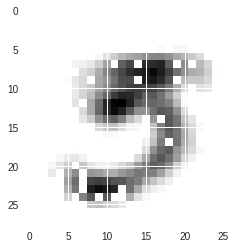

In [114]:
u3=ac3.reshape(28,28)*255
xz3=np.abs(u3)
plt.imshow(xz3)